In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv(r"C:\Users\DELL\Documents\Health Care Dashboarb\Dataset\Hospital Readmission.csv")

#print the first five of the dataset
data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
# information about the dataset

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [4]:
# output the size of the data
print(data.shape)

(25000, 17)


In [5]:
# Check for missing data
print(data.isnull().sum())


age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64


In [6]:
# Check data types
print(data.dtypes)

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object


In [7]:
# Checking for duplicate case

print(data.duplicated().sum()) 

0


In [8]:
# Define a function to convert age ranges (e.g., '30-39') into midpoint values (e.g., 35)
def age_to_mid(age_range):
    # Remove any brackets or parentheses that may surround the age range (e.g., '[30-39]' → '30-39')
    low, high = age_range.strip('[]()').split('-')
    
    # Convert both the lower and upper bounds to integers, 
    # calculate their average (midpoint), and round it to the nearest whole number
    return int(round((int(low) + int(high)) / 2))

# Apply the function to the 'age' column and create a new column 'age_mid' 
# containing the numeric midpoint values for each age range
data['age_mid'] = data['age'].apply(age_to_mid)


In [9]:
data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,age_mid
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,75
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,75
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,55
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,75
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,65


In [10]:
# -------------------------------
#  FEATURE ENGINEERING
# -------------------------------
# Handle 'readmitted' as target variable
# Convert 'no' → 0, 'yes' → 1
data['readmitted'] = data['readmitted'].map({'no': 0, 'yes': 1})

# Create derived numeric features
data['total_visits'] = data['n_outpatient'] + data['n_inpatient'] + data['n_emergency']
data['procedure_intensity'] = data['n_lab_procedures'] / (data['time_in_hospital'] + 1)
data['medication_per_day'] = data['n_medications'] / (data['time_in_hospital'] + 1)

# Optional: Create a simplified version of diagnosis (if text-based)
# Combine all three diagnosis columns into one for quick analysis
#df['main_diag'] = df['diag_1'].fillna('Unknown')

# Check for any remaining missing values
print("Missing values per column:")
print(data.isnull().sum())

# Quick preview of transformed dataset
print("\nSample after feature engineering:")
print(data.head())


Missing values per column:
age                    0
time_in_hospital       0
n_lab_procedures       0
n_procedures           0
n_medications          0
n_outpatient           0
n_inpatient            0
n_emergency            0
medical_specialty      0
diag_1                 0
diag_2                 0
diag_3                 0
glucose_test           0
A1Ctest                0
change                 0
diabetes_med           0
readmitted             0
age_mid                0
total_visits           0
procedure_intensity    0
medication_per_day     0
dtype: int64

Sample after feature engineering:
       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [6

In [12]:
# Clean and encode binary yes/no columns safely
binary_cols = ['glucose_test', 'A1Ctest', 'change', 'diabetes_med']

for col in binary_cols:
    data[col] = (
        data[col]
        .astype(str)                                   # ensure all values are strings
        .str.lower()                                   # standardize case
        .replace({'missing': np.nan, 'unknown': np.nan, '?': np.nan, 'nan': np.nan})
        .map({'yes': 1, 'no': 0})                      # encode yes/no
        .fillna(0)                                     # assume missing = 0 (no test)
        .astype(int)                                   # convert to integer (no decimals)
    )

# Check for any remaining missing values
print("Missing values per column:")
print(data.isnull().sum())

# Quick preview of transformed dataset
print("\nSample after feature engineering:")
print(data.head())

Missing values per column:
age                    0
time_in_hospital       0
n_lab_procedures       0
n_procedures           0
n_medications          0
n_outpatient           0
n_inpatient            0
n_emergency            0
medical_specialty      0
diag_1                 0
diag_2                 0
diag_3                 0
glucose_test           0
A1Ctest                0
change                 0
diabetes_med           0
readmitted             0
age_mid                0
total_visits           0
procedure_intensity    0
medication_per_day     0
dtype: int64

Sample after feature engineering:
       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [6

In [13]:
# ------------------------------------
# DESCRIPTIVE ANALYSIS
# ------------------------------------

# Overview of data structure
print("\nDataset Information:")
print(data.info())

# Statistical summary of numeric columns
print("\nDescriptive Statistics:")
print(data.describe().T)

# Check unique values in categorical columns
categorical_cols = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3']
for col in categorical_cols:
    print(f"\nUnique values in {col}: {data[col].nunique()}")



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  25000 non-null  object 
 1   time_in_hospital     25000 non-null  int64  
 2   n_lab_procedures     25000 non-null  int64  
 3   n_procedures         25000 non-null  int64  
 4   n_medications        25000 non-null  int64  
 5   n_outpatient         25000 non-null  int64  
 6   n_inpatient          25000 non-null  int64  
 7   n_emergency          25000 non-null  int64  
 8   medical_specialty    25000 non-null  object 
 9   diag_1               25000 non-null  object 
 10  diag_2               25000 non-null  object 
 11  diag_3               25000 non-null  object 
 12  glucose_test         25000 non-null  int32  
 13  A1Ctest              25000 non-null  int32  
 14  change               25000 non-null  int32  
 15  diabetes_med  

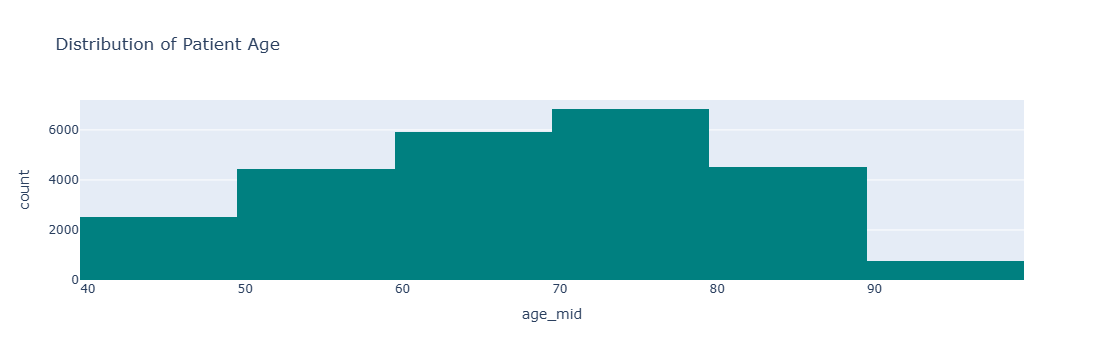

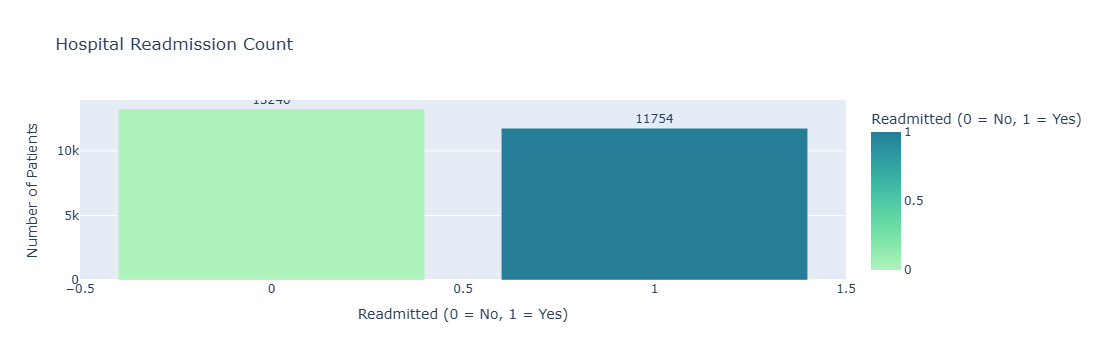

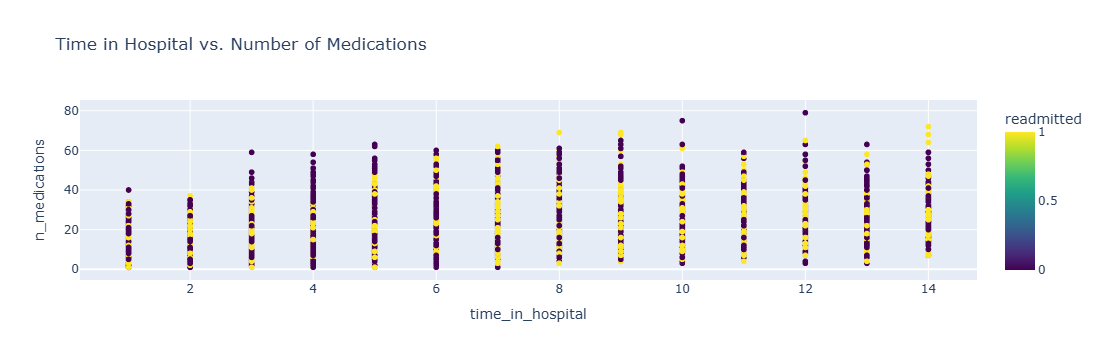

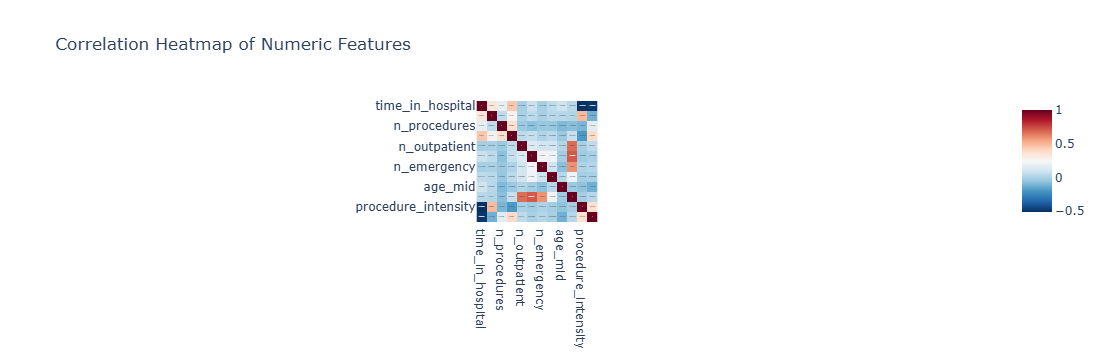

In [17]:
import plotly.express as px
import plotly.graph_objects as go

# Distribution of Age
fig_age = px.histogram(data, x='age_mid', nbins=10, title='Distribution of Patient Age', color_discrete_sequence=['teal'])
fig_age.show()

# Calculate readmission counts
readmit_counts = data['readmitted'].value_counts().reset_index()
readmit_counts.columns = ['readmitted', 'count']  # rename columns properly

# Create bar chart
fig_readmit = px.bar(
    readmit_counts,
    x='readmitted',
    y='count',
    text='count',
    labels={'readmitted': 'Readmitted (0 = No, 1 = Yes)', 'count': 'Number of Patients'},
    title='Hospital Readmission Count',
    color='readmitted',
    color_continuous_scale='Tealgrn'
)
fig_readmit.update_traces(textposition='outside')
fig_readmit.show()

# Relationship between Hospital Stay and Medications
fig_stay = px.scatter(data, x='time_in_hospital', y='n_medications', 
                      color='readmitted',
                      title='Time in Hospital vs. Number of Medications',
                      color_continuous_scale='Viridis')
fig_stay.show()

# Correlation Heatmap
corr_matrix = data.select_dtypes(include=['int64', 'float64']).corr()
fig_corr = px.imshow(corr_matrix, 
                     text_auto=True, 
                     title="Correlation Heatmap of Numeric Features",
                     color_continuous_scale='RdBu_r')
fig_corr.show()
